In [2]:
%matplotlib inline

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD

# Dimensionality Reduction

## Misc notes

CleverHans - Python library to benchmark machine learning systems' vulnerability to adversarial examples.

cleverhans blog (good stuff) - https://www.cleverhans.io/

Adversarial examples - https://christophm.github.io/interpretable-ml-book/adversarial.html

InterpretML - https://interpret.ml/

Biclustering - https://academic.oup.com/bib/article/25/4/bbae342/7713725

Jaccard index (Jaccard similarity coefficient) - https://en.wikipedia.org/wiki/Jaccard_index

Matrix factorization

Multimodal late fusion

## Presentation notes

Undersampling - https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/

Oversampling - https://medium.com/@abdallahashraf90x/oversampling-for-better-machine-learning-with-imbalanced-data-68f9b5ac2696

**Principal Component Analysis (PCA)** - results in:
- output features being ordered according to importance
- output features are decorrelated/linearly independent!
- output features describe the maximized dispertion/variance

**Variance as a Measure of Dispersion:**  
- Variance in a dataset describes how spread out or dispersed the data points are. A high variance means data points are widely spread from the mean, while low variance means they are close to the mean.
- PCA aims to capture as much of this "spread" or dispersion as possible using fewer dimensions than the original feature space.

**Principal Components and Dispersion:**  
- PCA identifies new axes (called principal components) that are linear combinations of the original features. These components are ordered by the amount of variance they capture in the data.  
- The first principal component is the direction along which the data has the highest variance. This means it captures the most dispersion or spread of the data.  
- Subsequent principal components are orthogonal (perpendicular) to the previous ones and capture as much of the remaining variance as possible.

https://medium.com/analytics-vidhya/principal-component-analysis-pca-part-1-fundamentals-and-applications-8a9fd9de7596

Explained variance & explained variance ratio

Singular value decomposition (SVD) (used by PCA) - https://www.geeksforgeeks.org/singular-value-decomposition-svd/  
vs.  
Eigendecomposition - https://builtin.com/data-science/eigendecomposition

**Cosine similarity (cosine kernels) - often used for working with text**  
Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

Manifold - повърхнина

Isometric Mapping

t-distributed stochastic neighbor embedding (t-SNE) - https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea

UMAP: Uniform Manifold Approximation and Projection - https://umap-learn.readthedocs.io/en/latest/

Latent Dirichlet allocation (LDA) - https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

Non-negative matrix factorization (NMF or NNMF) - https://en.wikipedia.org/wiki/Non-negative_matrix_factorization

## Demo

### 1st part

In [3]:
iris = load_iris()

In [4]:
attributes, targets = iris["data"], iris["target"]

In [6]:
pca = PCA()

In [7]:
pca.fit(attributes)

PCA()

In [8]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [9]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [11]:
pca.transform(attributes).shape

(150, 4)

In [12]:
transformed_attributes = pca.transform(attributes)

In [13]:
transformed_attributes.shape

(150, 4)

In [14]:
transformed_attributes.std(axis = 0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

In [15]:
transformed_attributes.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

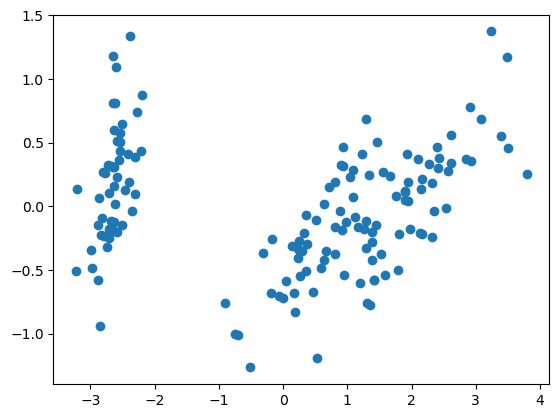

In [18]:
plt.scatter(transformed_attributes[:, 0], transformed_attributes[:, 1])
plt.show()

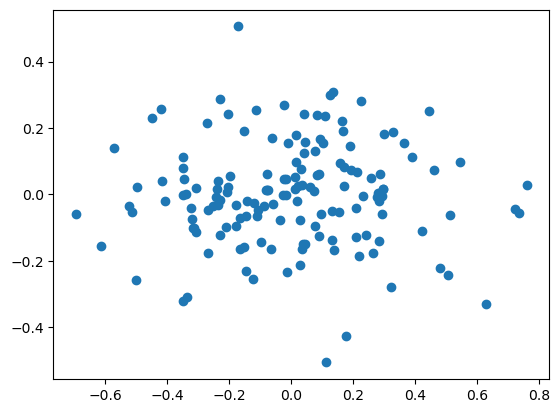

In [19]:
plt.scatter(transformed_attributes[:, 2], transformed_attributes[:, 3])
plt.show()

In [20]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [22]:
pca.explained_variance_.sum()

4.572957046979866

In [23]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [24]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

### 2nd part

In [41]:
np.random.seed(58)

In [59]:
x = np.random.normal(3.5, scale = 3, size = 500)

In [60]:
y = np.random.normal(2.4, scale = 2, size = 500)

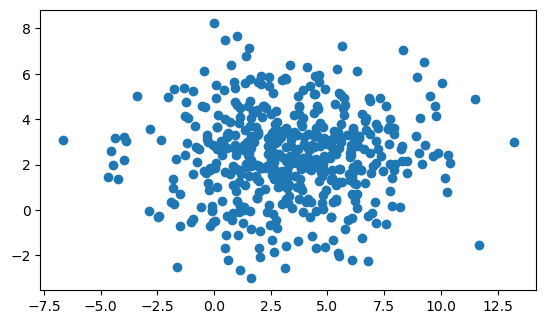

In [61]:
plt.scatter(x, y)
plt.gca().set_aspect("equal")
plt.show()

In [66]:
points = np.array([x, y]).reshape(500, 2)

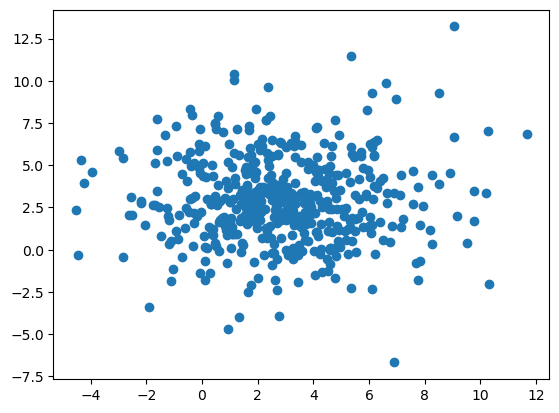

In [67]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [68]:
result = points @ np.array([[1, 0.5], [0.7, 1]])

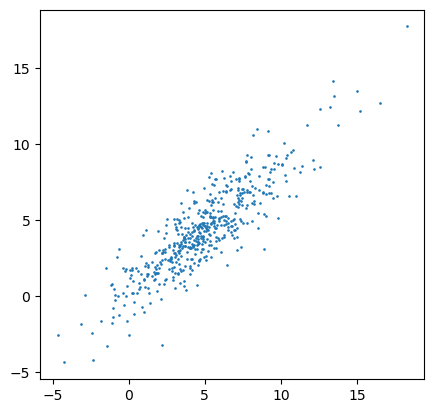

In [94]:
plt.scatter(result[:, 0], result[:, 1], s = 0.8)
plt.gca().set_aspect("equal")
plt.show()

In [73]:
data = result.copy()

In [78]:
center = data.mean(axis = 0)

In [79]:
center

array([4.86178732, 4.33166131])

In [80]:
np.cov(data)

array([[ 9.75919729e+00, -3.32538867e+00, -2.29489870e-01, ...,
         1.31916126e+00,  3.03723125e+00, -6.09849413e-01],
       [-3.32538867e+00,  1.13310649e+00,  7.81973137e-02, ...,
        -4.49496386e-01, -1.03491856e+00,  2.07802575e-01],
       [-2.29489870e-01,  7.81973137e-02,  5.39650943e-03, ...,
        -3.10203941e-02, -7.14212226e-02,  1.43407555e-02],
       ...,
       [ 1.31916126e+00, -4.49496386e-01, -3.10203941e-02, ...,
         1.78312456e-01,  4.10545835e-01, -8.24340053e-02],
       [ 3.03723125e+00, -1.03491856e+00, -7.14212226e-02, ...,
         4.10545835e-01,  9.45238975e-01, -1.89795701e-01],
       [-6.09849413e-01,  2.07802575e-01,  1.43407555e-02, ...,
        -8.24340053e-02, -1.89795701e-01,  3.81093133e-02]])

In [83]:
np.corrcoef(data, rowvar = False)

array([[1.        , 0.88093463],
       [0.88093463, 1.        ]])

In [84]:
np.cov(data, rowvar = False)

array([[10.06159874,  7.99890215],
       [ 7.99890215,  8.19419723]])

In [85]:
covariance_matrix = np.cov(data - center, rowvar = False)

In [86]:
np.linalg.eig(covariance_matrix)

EigResult(eigenvalues=array([17.18111055,  1.07468542]), eigenvectors=array([[ 0.74697436, -0.66485284],
       [ 0.66485284,  0.74697436]]))

In [88]:
# orthogonality check
np.dot(np.linalg.eig(covariance_matrix).eigenvectors[:, 0], np.linalg.eig(covariance_matrix).eigenvectors[:, 1])

0.0

In [89]:
np.linalg.eig(covariance_matrix).eigenvectors

array([[ 0.74697436, -0.66485284],
       [ 0.66485284,  0.74697436]])

In [90]:
pca.fit(data).components_

array([[ 0.74697436,  0.66485284],
       [ 0.66485284, -0.74697436]])

In [91]:
transformed_data = pca.transform(data)

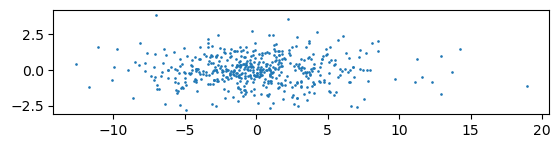

In [93]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 0.8)
plt.gca().set_aspect("equal")
plt.show()

In [95]:
pca = PCA(n_components = 1)

In [96]:
pca.fit(data)

PCA(n_components=1)

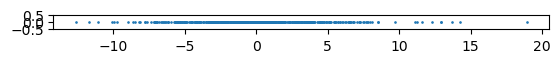

In [98]:
plt.scatter(transformed_data[:, 0], [0] * len(data), s = 0.8)
plt.ylim(-0.5, 0.5)
plt.gca().set_aspect("equal")

In [114]:
texts = fetch_20newsgroups()

In [104]:
tfidf = TfidfVectorizer()

In [115]:
tfidf.fit(texts["data"])

TfidfVectorizer()

In [116]:
tfidf_result = tfidf.transform(texts)

In [117]:
tfidf_result

<5x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [119]:
tfidf_dr = TruncatedSVD(n_components = 25)  

In [120]:
pca.explained_variance_ratio_

array([0.94113182])

In [113]:
KernelPCA(n_components = 2, kernel = "rbf")

KernelPCA(kernel='rbf', n_components=2)